<a href="https://colab.research.google.com/github/qiao-hao-git/ML_Code/blob/main/Deep_Learning_with_Python_TensorFlow_and_Keras/Basic_Images_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


导入Fashion MNIST数据集

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',' Shirt','Sneaker','Bag','Ankle boot']

浏览数据

In [6]:
print(train_images.shape)

(60000, 28, 28)


In [7]:
print(len(train_labels))

60000


In [8]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [10]:
print(test_images.shape)

(10000, 28, 28)


In [11]:
print(len(test_labels))

10000


预处理数据

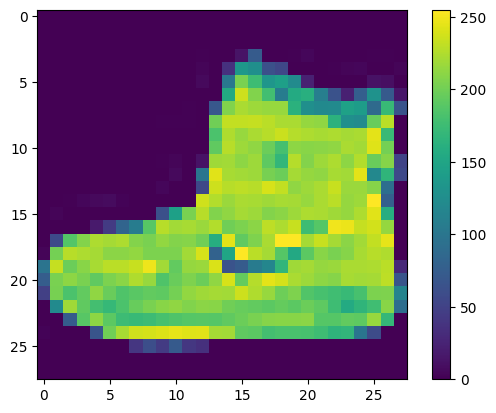

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images/255.0
test_images = test_images/255.0

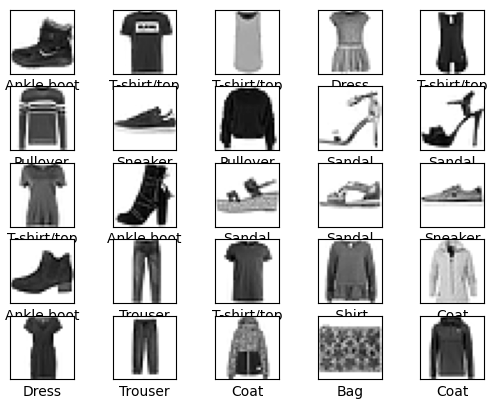

In [14]:
plt.figure()
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

##构建模型
设置层

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128,activation='relu'),tf.keras.layers.Dense(10)])

编译模型

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

训练网络

In [18]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4933 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3712 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3325 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2921 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2657 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2571 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

评估准确率

In [19]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("\nTest accuracy:",test_acc)

313/313 - 1s - loss: 0.3371 - accuracy: 0.8854 - 810ms/epoch - 3ms/step

Test accuracy: 0.8853999972343445


进行预测

In [22]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [24]:
print(predictions[0])

[2.8480249e-10 7.0455584e-09 6.3306062e-11 3.5800501e-12 1.1393784e-09
 1.5399063e-03 1.6090850e-08 5.2783703e-03 1.1632702e-08 9.9318159e-01]


In [27]:
print(np.argmax(predictions[0]))

9


In [28]:
print(test_labels[0])

9


In [35]:
def plot_image(i,predictions_array,true_label,img):
  true_label,img = true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

验证预测结果

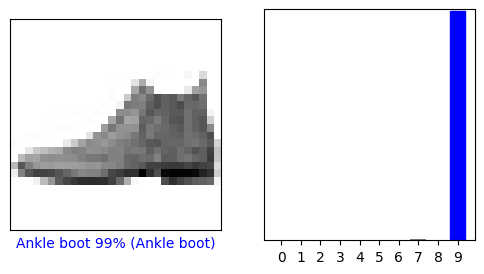

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

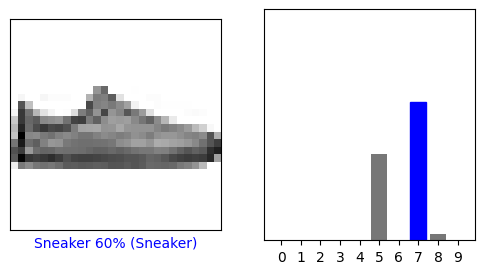

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

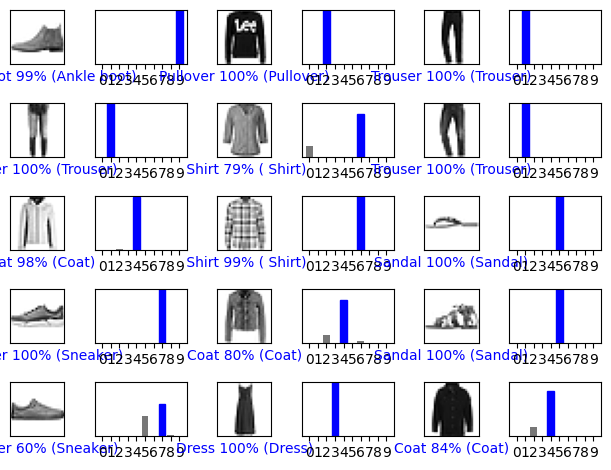

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure()
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

使用训练好的模型

In [40]:
img = test_images[1]
print(img.shape)

(28, 28)


In [41]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 30ms/step
[[7.8530411e-07 6.6619088e-17 9.9865711e-01 1.2187781e-10 1.2165129e-03
  2.7528103e-14 1.2555014e-04 7.1034274e-16 1.2904274e-11 1.0356709e-13]]


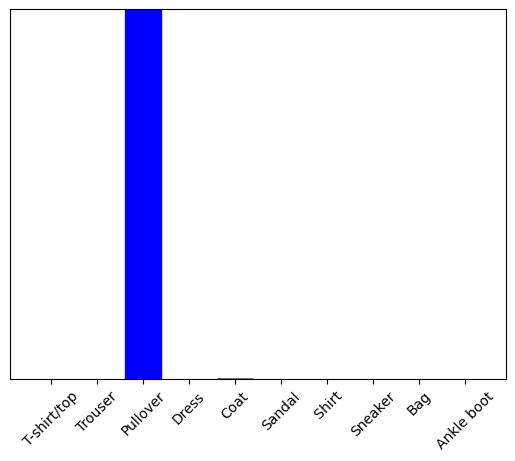

In [43]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [44]:
np.argmax(predictions_single[0])

2